## 统计某动作堆积重量
所以这三个动作作为mvp，统计它们每周的堆积总重量（路演demo选一个统计就够了），也就是简单加总。比如某周深蹲做了两次，第一次、第二次分别如下：

id | exercise | duration | repetition | set | weight
-- | -- | -- | -- | -- | --
0 | 深蹲 | 30 | 6 | 5 | 20
1 | 深蹲 | 10 | 10 | 3 | 15

重量堆积＝6 ＊ 5 ＊ 20 ＋ 10 ＊ 3 ＊ 5＝750kg

备注：重量堆积是一个周期内训练所积累的所有负重，等于每次负重＊次数＊组数，也就是表格中的repetition＊set＊weight。比如某次训练深蹲用50kg做了3组（set）10次（repetition），重量堆积为50＊3＊10=1500kg

## 可视化展示
2. 某个动作的柱状图－日期／某项动作重量堆积维度

- 横轴单位刻度是日期、纵轴刻度单位是重量堆积（kg）
- 其中重量堆积算法，参考上文 “统计某动作堆积重量” 小节
<img width="528" alt="screen shot 2017-10-30 at 12 08 03 am" src="https://user-images.githubusercontent.com/17700597/32145607-77dd49be-bd06-11e7-8704-63e217b4c85c.png">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../raw.csv/2FITMOVEMENT-Table 1.csv')
df.head()

,id,date,exercise,duration,repetition,set,weight,distance
0,0,11-1,深蹲,30,6,5,20,0
1,1,11-1,卧推,10,10,3,15,0
2,2,11-1,飞鸟,10,10,3,5,0
3,3,11-1,哑铃卧推,15,10,3,15,0
4,4,11-1,卷腹,10,50,3,5,0


In [4]:
UniqueAct = df.exercise.unique()
# print(UniqueAct)

In [5]:
#coding = 'utf-8'
sl = df[df['exercise'].isin(['深蹲'])]
sl

,id,date,exercise,duration,repetition,set,weight,distance
0,0,11-1,深蹲,30,6,5,20,0
9,9,11-1,深蹲,28,10,1,14,0
27,27,11-3,深蹲,12,8,6,17,0
49,49,11-4,深蹲,24,9,4,10,0
54,54,11-4,深蹲,29,6,6,17,0
67,67,11-5,深蹲,11,8,8,12,0
73,73,11-5,深蹲,30,9,2,19,0
87,87,11-6,深蹲,15,8,2,15,0


In [6]:
sl['weights'] = sl.apply(lambda x: x.repetition*x.set*x.weight, axis=1)
sl

/Users/liguanghe/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,date,exercise,duration,repetition,set,weight,distance,weights
0,0,11-1,深蹲,30,6,5,20,0,600
9,9,11-1,深蹲,28,10,1,14,0,140
27,27,11-3,深蹲,12,8,6,17,0,816
49,49,11-4,深蹲,24,9,4,10,0,360
54,54,11-4,深蹲,29,6,6,17,0,612
67,67,11-5,深蹲,11,8,8,12,0,768
73,73,11-5,深蹲,30,9,2,19,0,342
87,87,11-6,深蹲,15,8,2,15,0,240


In [7]:
#s = np.sum(sl)['weights']
#print (s)

In [8]:
Uniquedate = df.date.unique()
Uniquedate

array(['11-1', '11-2', '11-3', '11-4', '11-5', '11-6'], dtype=object)

In [9]:
date = []
ws = []

for i in Uniquedate:
    date.append(i)
    ws.append(np.sum(sl[sl['date'].isin([i])])['weights'])
    d = {'date': date,
             'weights':ws}
st = pd.DataFrame(d)
st

,date,weights
0,11-1,740.0
1,11-2,0.0
2,11-3,816.0
3,11-4,972.0
4,11-5,1110.0
5,11-6,240.0


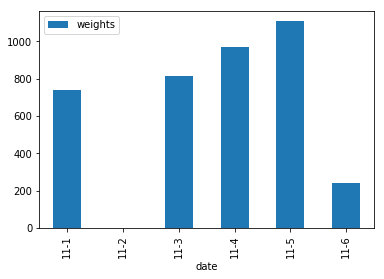

In [12]:
p = st.plot.bar(x = 'date', y = 'weights')
plt.show()

In [63]:
fig = p.get_figure()
fig.savefig("output.png")

In [12]:
#coding = 'utf-8'
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import sys


df = pd.read_csv('../raw.csv/2FITMOVEMENT-Table 1.csv')
	#列出运动
UniqueAct = df.exercise.unique()
#选出深蹲
sl = df[df['exercise'].isin(['深蹲'])]
#添加每条重量加乘
sl['weights'] = sl.apply(lambda x: x.repetition*x.set*x.weight, axis=1)
#列出日期
Uniquedate = df.date.unique()

#日期和重量累积的矩阵
date = []
ws = []

for i in Uniquedate:
    date.append(i)
    ws.append(np.sum(sl[sl['date'].isin([i])])['weights'])
    d = {'date': date,
         'weights':ws}
st = pd.DataFrame(d)
st

/Users/liguanghe/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,weights
0,11-1,740.0
1,11-2,0.0
2,11-3,816.0
3,11-4,972.0
4,11-5,1110.0
5,11-6,240.0


In [13]:
from bokeh.charts import Bar, output_file, show
from bokeh.sampledata.autompg import autompg as df


# create a new plot with a title and axis labels
p = bar(st,  'date', values='weights', title="深蹲累积" )
# add a line renderer with legend and line thickness
output_file("bar.html")
show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

  Could not find a version that satisfies the requirement bokeh.charts (from versions: )
No matching distribution found for bokeh.charts
